In [11]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px

In [12]:
#Import Data
df = pd.read_csv('./survey.csv')
#view Sample
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [14]:
AnalysisData1 = pd.DataFrame(df, columns = ['Country','state','family_history','treatment', 'work_interfere','Gender'])

In [15]:
AnalysisData1.head()

,Country,state,family_history,treatment,work_interfere,Gender
0,United States,IL,No,Yes,Often,Female
1,United States,IN,No,No,Rarely,M
2,Canada,NaN,No,No,Rarely,Male
3,United Kingdom,NaN,Yes,Yes,Often,Male
4,United States,TX,No,No,Never,Male


In [16]:
#Create column for mental_illness
conditions = [
    (df['family_history'] == 'Yes') ,
    (df['treatment'] == 'Yes') ,
    (df['work_interfere'] == 'Often'),
    (df['work_interfere'] == 'Sometimes')]
choices = ['yes','yes','yes','yes']
AnalysisData1['mental_Issue'] = np.select(conditions, choices, default = 'no')
AnalysisData1.head()

,Country,state,family_history,treatment,work_interfere,Gender,mental_Issue
0,United States,IL,No,Yes,Often,Female,yes
1,United States,IN,No,No,Rarely,M,no
2,Canada,NaN,No,No,Rarely,Male,no
3,United Kingdom,NaN,Yes,Yes,Often,Male,yes
4,United States,TX,No,No,Never,Male,no


In [17]:
#Mental Health Deficiency
MHD = pd.DataFrame(AnalysisData1, columns = ['Country','state','mental_Issue'])
MHD_Yes = MHD[MHD['mental_Issue'].str.contains('yes')]
MHD_Yes.head()

,Country,state,mental_Issue
0,United States,IL,yes
3,United Kingdom,NaN,yes
5,United States,TN,yes
6,United States,MI,yes
8,United States,IL,yes


In [18]:
MHD_Group = MHD_Yes.groupby(['Country'])['Country'].count().reset_index(name='total')
MHD_Group.head()

,Country,total
0,Australia,18
1,Austria,2
2,"Bahamas, The",1
3,Belgium,3
4,Bosnia and Herzegovina,1


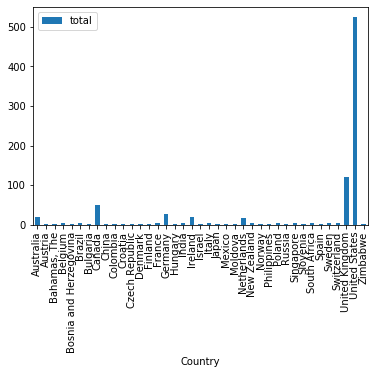

In [19]:
MHD_Group.plot.bar(x="Country")